# Logistic Regression on Titanic Dataset

O texto deste trabalho foi escrito em português e inglês para a melhor compreensão de todos. 

O objetivo é classificar os sobreviventes do acidente do Titanic com base em alguns parâmetros. Para isso, foi feita visualização dos dados, e a sua limpeza. Para fazer a regressão logística foi utilizada a biblioteca SKlearn. O dataset utilizado pode ser encontrado em https://www.kaggle.com/c/titanic/ . O conjunto de treino e de teste estão presentes no dataset, por isso não foi feita a divisão deles nesse trabalho. As métricas mais comuns para avaliar a performance foi computada, mas deixarei pra explica-las em outro artigo para este trabalho não ficar muito extenso.

The objective is to classify the survivors of the Titanic accident based on some parameters. For this, the data was visualized and cleaned. To perform logistic regression, the SKlearn library was used. The dataset used can be found at https://www.kaggle.com/c/titanic. The training and test sets are present in the dataset, so they were not divided in this work. The most common metrics for evaluating performance were computed, but I will explain them in another article.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

Vamos importar os dados.

Let's import the data.

In [3]:
genderSubmition = pd.read_csv('gender_submission.csv')
testDataset     = pd.read_csv('test.csv')
trainDataset    = pd.read_csv('train.csv')

In [4]:
genderSubmition.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
testDataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
trainDataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualização dos dados - DataViz

Visualizemos os dados para facilitar a limpeza. Mostraremos duas formas de ver os dados faltantes, com heatmap e porcentagem de dados faltantes.

Let's visualize the data to make the step of cleaning data easier. We show two ways to see the missing data, with heatmap and percentage of missing data.

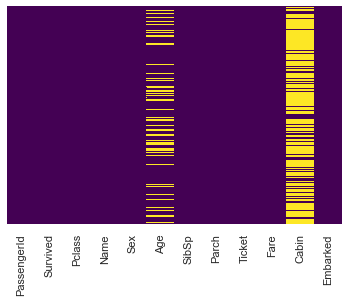

In [6]:
sns.heatmap(trainDataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

O gráfico acima mostra a distribuição de valores faltantes, a função abaixo plota a porcentagem de dados faltantes em cada campo.

The graph above shows the distribution of missing values, the function below plots the percentage of missing data in each field.

In [7]:
def plotMissingPercentage(df):
    total = df.shape[0]
    columns = list(df.columns)
    percentageMissing = []
    for i in columns:
        percentage = df[df[i].isnull()].shape[0]/total*100
        percentageMissing.append(percentage)
    sns.barplot(percentageMissing, columns, palette='mako',dodge=True)

O gráfico abaixo mostra a porcentagem dos dados faltantes.

The graph below shows the percentage of missing data.

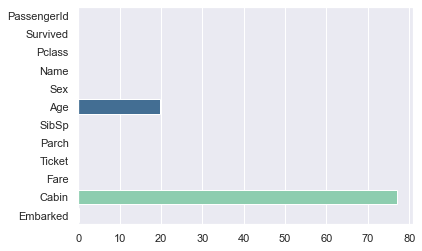

In [8]:
plotMissingPercentage(trainDataset)

Plotamos uma comparação entre o sexos dos que sobreviveram e dos que morreram. Note que a maioria dos homens morreram e a maioria das mulheres sobreviveram.

We plot a comparison between the sexes of those who survived and those who died. Note that most men died and most women survived.

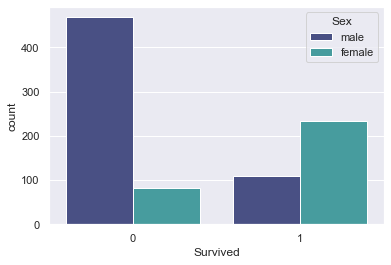

In [9]:
sns.countplot(x='Survived',hue='Sex',data=trainDataset,palette='mako')

Plotemos a morte com relação as classes. A maiores mortes ocorreram na terceira classe e os de primeira classe foram os que mais sobreviveram.

We plot death with respect to classes. The highest deaths occurred in the third class and those in the first class were the ones that survived the most.

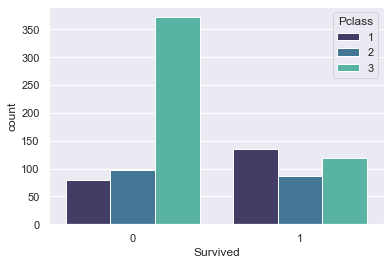

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=trainDataset,palette='mako')

A distribuição das idades. 

Age distribution. 

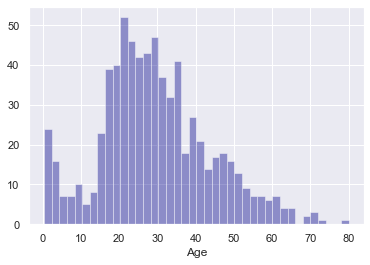

In [11]:
sns.distplot(trainDataset['Age'].dropna(),kde=False, color='darkblue',bins=40)

## Data Cleaning - Limpeza de dados

Invés de usar a média, vamos criar uma outra estratégia para substituir os 20% de idades faltantes. Vamos substituir pela média das classes do Titanic. Removemos a coluna das cabines pois tem quase 80% de dados faltantes.

Instead of using the average, we will create another strategy to replace the missing 20% of ages. Let's replace it with the average of the Titanic classes. We removed the column from the booths as it has almost 80% of missing data.

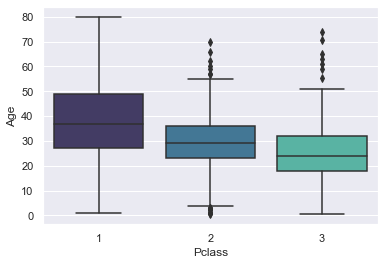

In [12]:
sns.boxplot(x='Pclass',y='Age',data=trainDataset,palette='mako')

Se for de primeira classe a média é 37, de segunda classe é 29 e 24 de terceura classe. Criamos uma função para isto com o nome de substituteAge.

If it is first class the average is 37, the second class is 29 and the third class is 24. We created a function for this with the name of substituteAge.

In [13]:
def substituteAge(X):
    age = X[0]
    pclass = X[1]    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [14]:
trainDataset['Age'] = trainDataset[['Age','Pclass']].apply(substituteAge,axis=1)

In [15]:
trainDataset.drop(columns=['Cabin'],inplace=True)

In [16]:
testDataset.drop(columns=['Cabin'],inplace=True)

In [17]:
trainDataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
testDataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Vamos terminar de fazer a limpeza de dados.

Let's finish cleaning the data.

In [19]:
len(trainDataset['Ticket'].unique())

681

Vamos remover o campo de tickets já que tem muitos valores diferentes. 

Remove the Ticket field since it has too many types.

In [20]:
trainDataset.drop(columns=['Ticket'],axis=1,inplace=True)
testDataset.drop(columns=['Ticket'],axis=1,inplace=True)

Vamos arredondar o campo de valor pago para duas casas decimais. 

We will round the Fare field to two decimal places.

In [22]:
trainDataset['Fare'] = trainDataset['Fare'].apply(np.around,decimals=2)

Apenas por curiosidade vamos checar quantos tipos de valores diferentes foram pagos para viajar no Titanic. 

Just out of curiosity we will check how many different types of money were paid to travel on the Titanic.

In [23]:
len(trainDataset['Fare'].unique())

236

Existem dois valores em que o campo Embarked é NaN vamos arrumar isto. 

There are two values in which the Embarked field is NaN.

In [24]:
trainDataset[trainDataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


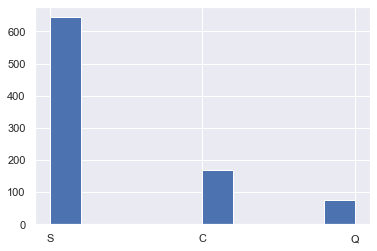

In [38]:
trainDataset['Embarked'].hist()

Como são só duas entradas nulas, vamos substituir pelo valor mais comum. 

Since there are only two null entries, we will replace it with the most common value.

In [25]:
trainDataset['Embarked'].fillna('S',inplace=True)

In [26]:
trainDataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Vamos checar os valores únicos do resto dos campos para saber se são variáveis categóricas. 

Let's check the unique values of the rest of the fields to see if they are categorical variables.

In [27]:
trainDataset['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [28]:
trainDataset['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

## Logistic Regression 

### Tratamento final dos dados - Last Data Preparation

Vamos carregar as bibliotecas para fazer a regressão logistica. Primeiro precisamos escalonar os dados e usar OneHotEncoder para lidar com as variávies categóricas. O campo PClass vai ser lidado como variavel númerica pois é uma variável categórica ordinal. Para executar essa ação usamos a biblioteca ColumnTransformer da biblioteca SKlearn.

We are going to load the libraries to do the logistic regression. First, we need to scale the data and use OneHotEncoder to deal with categorical variables. The PClass field will be treated as a numerical variable as it is an ordinal categorical variable. To perform this action we use the ColumnTransformer library from the SKlearn library.

In [29]:
import warnings
import sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
trainDataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

Aqui dividimos as váriaveis em dois grupos, o numérico e o categórico. O categórico é passado no onehotencoder e o númerico vai ser escalonado pelo StandardScaler.

Here we divide the variables into two groups, the numeric and the categorical. The categorical is passed in the onehotencoder and the numeric will be scaled by StandardScaler.

In [31]:
categoricalFields = ['Sex','Embarked']
numericalFields = ['Pclass','Age','SibSp','Parch','Fare']

In [32]:
X = trainDataset[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
y = trainDataset['Survived']

In [33]:
columnTranformer = ColumnTransformer([('Categorical',OneHotEncoder(drop='first'),categoricalFields),('Numerical',StandardScaler(),numericalFields)])
X = columnTranformer.fit_transform(X)

In [34]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html    
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [35]:
get_feature_names(columnTranformer)

<ipython-input-34-09bf0727296b>:31: UserWarning: Transformer Numerical (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['Categorical__x0_male',
 'Categorical__x1_Q',
 'Categorical__x1_S',
 'Numerical__Pclass',
 'Numerical__Age',
 'Numerical__SibSp',
 'Numerical__Parch',
 'Numerical__Fare']

### Regressão logística e algumas métricas - Logistic Regression and some metrics. 

In [36]:
from sklearn.linear_model import LogisticRegression

Vamos iniciar e fitar a Regressão logística.

Let's start and look at Logistic Regression

In [37]:
logisticRegressor = LogisticRegression()

In [38]:
logisticRegressor.fit(X,y)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_curve


Vamos ver quão bem foi generalizado no conjunto de treino. 

Let's see how well it was widespread in the training set.

In [40]:
y_p = logisticRegressor.predict(X)

In [41]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



Os resultados pelo indice de precisão e recall indicam que não generalizou bem no conjunto de treino. Pra finalizar vamos ver o os gráficos da curva ROC e PrecisãoxRecall da classe dos que sobreviveram. 

The results by the precision and recall index indicate that he did not generalize well in the training set. Finally, we will see the graphs of the ROC curve and PrecisionxRecall of the class that survived.

In [42]:
y_pred = logisticRegressor.predict_proba(X)

In [43]:
ypred = y_pred[:,1]

In [44]:
fpr,tpr,_ = roc_curve(np.array(y),ypred)
precisions, recalls, thresholds = precision_recall_curve(np.array(y),ypred)

Vamos plotar o gráfico da curva ROC da classe dos que sobreviveram. 

Let's plot the graph of the ROC curve for the class of those who survived.

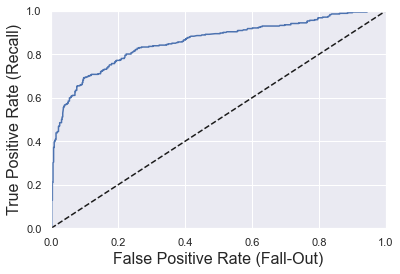

In [45]:
plt.plot(fpr,tpr)     
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                                       


Agora vamos plotar o gráfico da curva de PrecisionxRecall.

Now we are going to plot the graph of the PrecisionxRecall curve.

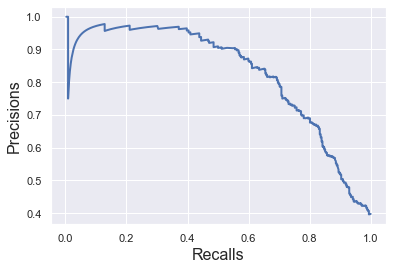

In [46]:
plt.plot(recalls[:-1],precisions[:-1], "b-",  linewidth=2)


plt.xlabel("Recalls", fontsize=16)        
plt.ylabel("Precisions", fontsize=16)        
plt.grid(True)                              


### Conjunto de testes - Test Set

Agora vamos ver quão bem a regressão logística se saiu no conjunto de testes. Precisamos tratar os dados de forma similar ao que foi tratado no conjunto de treino.

Now let's see how well the logistic regression did in the test suite. We need to treat the data similarly to what was treated in the training set. 

In [47]:
testDataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [48]:
Xteste = testDataset.merge(genderSubmition,left_on='PassengerId',right_on='PassengerId')

In [49]:
Xteste = Xteste[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked','Survived']]

In [50]:
Xteste.dropna(inplace=True)

In [51]:
yteste = Xteste['Survived']

In [52]:
genderSubmition.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [53]:
Xteste = columnTranformer.fit_transform(Xteste[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']])

In [54]:
Xteste

array([[ 1.        ,  1.        ,  0.        , ..., -0.55327231,
        -0.49211953, -0.54228095],
       [ 0.        ,  0.        ,  1.        , ...,  0.59130978,
        -0.49211953, -0.55584416],
       [ 1.        ,  1.        ,  0.        , ..., -0.55327231,
        -0.49211953, -0.51188479],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.55327231,
        -0.49211953, -0.5431675 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.55327231,
        -0.49211953,  1.11093161],
       [ 1.        ,  0.        ,  1.        , ..., -0.55327231,
        -0.49211953, -0.55175491]])

In [55]:
ytestePred = logisticRegressor.predict(Xteste)

In [56]:
print(classification_report(yteste,ytestePred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       204
           1       0.91      0.90      0.90       127

    accuracy                           0.93       331
   macro avg       0.92      0.92      0.92       331
weighted avg       0.93      0.93      0.93       331



Como podemos ver no conjunto de testes a regressão logística performou melhor. 

As we can see in the set of tests, logistic regression performed better.